In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/Users/rowlandhill/Documents/Northwestern/498/Project/Data/train.csv')
test = pd.read_csv('/Users/rowlandhill/Documents/Northwestern/498/Project/Data/test.csv')
severity_type = pd.read_csv('/Users/rowlandhill/Documents/Northwestern/498/Project/Data/severity_type.csv', error_bad_lines = False, warn_bad_lines = False)
resource_type = pd.read_csv('/Users/rowlandhill/Documents/Northwestern/498/Project/Data/resource_type.csv', error_bad_lines = False, warn_bad_lines = False)
log_feature = pd.read_csv('/Users/rowlandhill/Documents/Northwestern/498/Project/Data/log_feature.csv', error_bad_lines = False, warn_bad_lines = False)
event_type = pd.read_csv('/Users/rowlandhill/Documents/Northwestern/498/Project/Data/event_type.csv', error_bad_lines = False, warn_bad_lines = False)

In [3]:
### Understand the Size of the data & verify complete import ###

print('The shape of test set is: {}\n'.format(test.shape))
print('The shape of train set is: {}\n'.format(train.shape))
print('The shape of severity_type is: {}\n'.format(severity_type.shape))
print('The shape of resource_type is: {}\n'.format(resource_type.shape))
print('The shape of log_feature is: {}\n'.format(log_feature.shape))
print('The shape of event_type is: {}'.format(event_type.shape))

The shape of test set is: (11171, 2)

The shape of train set is: (7381, 3)

The shape of severity_type is: (18552, 2)

The shape of resource_type is: (21077, 2)

The shape of log_feature is: (58671, 3)

The shape of event_type is: (31171, 2)


In [4]:
### id column in event_types is an object ###

event_type.dtypes

id            object
event_type    object
dtype: object

In [6]:
### Convert the id column to numeric data type ###

event_type['id'] = pd.to_numeric(event_type['id'],errors = 'coerce')

In [7]:
### validate that train set is ok to merge with other DFs ###
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [8]:
### Merge all DFs into 1 ###

train_1 = train.merge(severity_type, how = 'left', left_on = 'id', right_on = 'id')
train_2 = train_1.merge(resource_type, how = 'left', left_on = 'id', right_on = 'id')
train_3 = train_2.merge(log_feature, how = 'left', left_on = 'id', right_on = 'id')
train_4 = train_3.merge(event_type, how = 'left', left_on = 'id', right_on = 'id')

In [9]:
### Validate ### 

train_4.head()

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34


In [10]:
### Check Sums ###

train_4.isnull().sum()

id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

In [11]:
### Examine record duplication on the back of merging ###

train_4.head(40)

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
5,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 35
6,9320,location 91,0,severity_type 2,resource_type 2,feature 235,116,event_type 34
7,9320,location 91,0,severity_type 2,resource_type 2,feature 235,116,event_type 35
8,14394,location 152,1,severity_type 2,resource_type 2,feature 221,1,event_type 35
9,14394,location 152,1,severity_type 2,resource_type 2,feature 221,1,event_type 34


In [12]:
### Remove Dups ###

train_4.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

In [13]:
### Verify Dups Removed ###

train_4.shape

(7381, 8)

### EDA ###

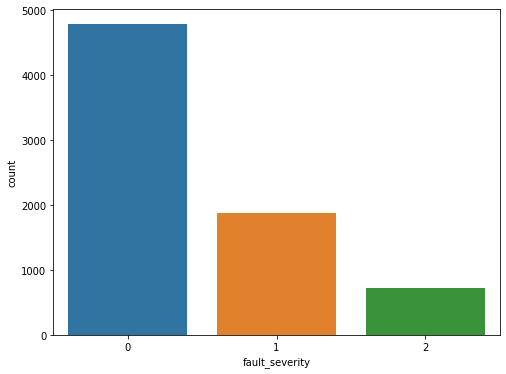

In [16]:
### Fault severity count ### 

plt.figure(figsize = (8, 6))
sns.countplot(train_4['fault_severity'])
plt.show()

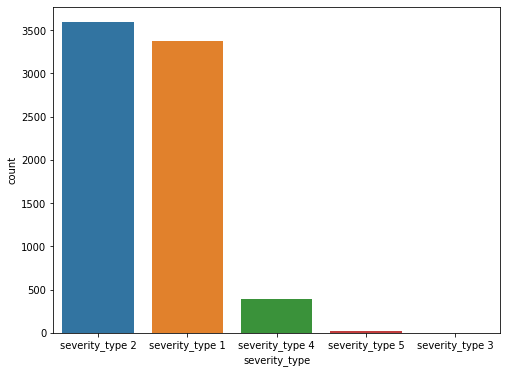

In [17]:
### Fault severity types ###

plt.figure(figsize = (8, 6))
sns.countplot(train_4['severity_type'])
plt.show()

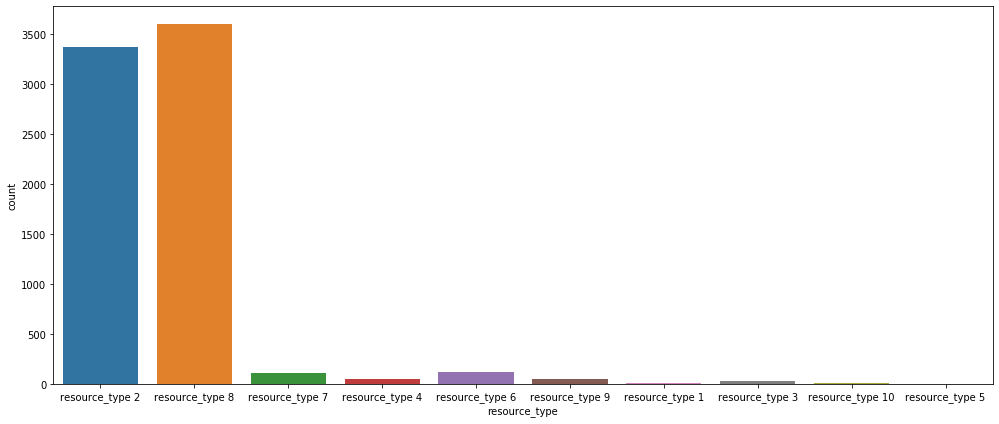

In [19]:
### Resource Type Counts ### 

plt.figure(figsize = (14, 6))
sns.countplot(train_4['resource_type'])
plt.tight_layout()
plt.show()

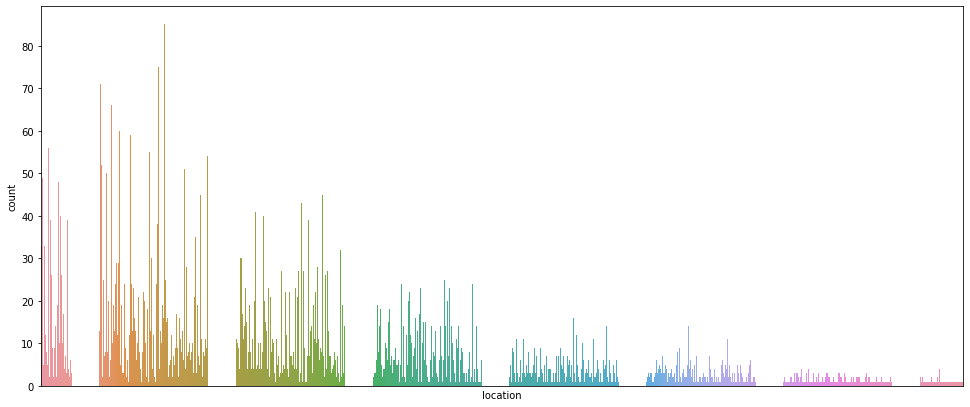

In [32]:
### Location Counts ### 

plt.figure(figsize = (14, 6))
sns.countplot(train_4['location'])
plt.tight_layout()
plt.xticks([])
plt.show()

In [33]:
print('We have',train_4.location.nunique(),'unique locations.')

We have 929 unique locations.


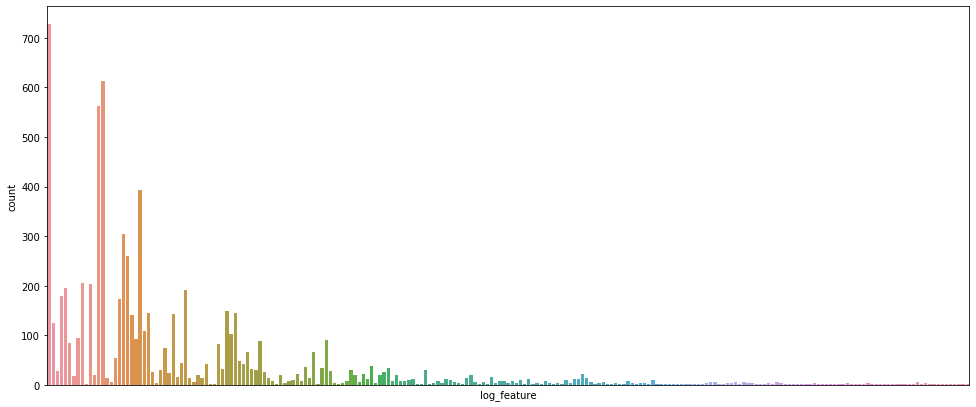

In [31]:
### Log Feature Counts ### 

plt.figure(figsize = (14, 6))
sns.countplot(train_4['log_feature'])
plt.tight_layout()
plt.xticks([])
plt.show()

In [34]:
print('We have', train_4.log_feature.nunique(),'unique log features.')

We have 223 unique log features.


In [38]:
### Check Data Types ### 

train_4.dtypes

id                 int64
location          object
fault_severity     int64
severity_type     object
resource_type     object
log_feature       object
volume             int64
event_type        object
dtype: object

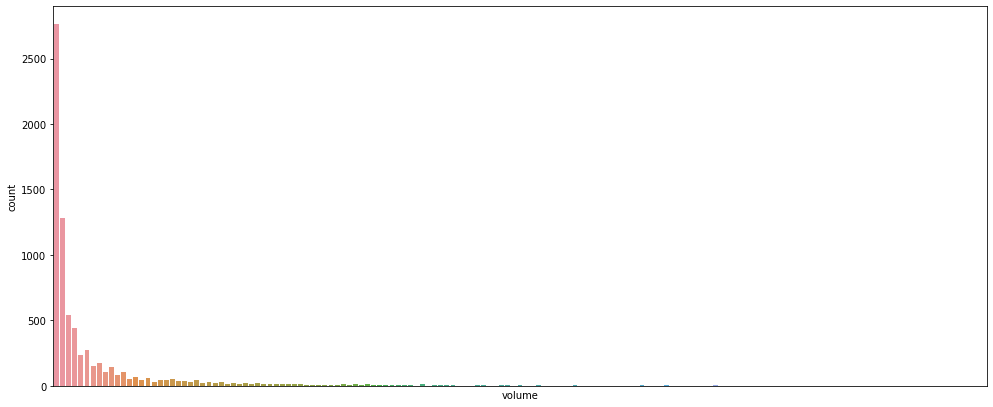

In [39]:
### Volume Counts ### 

plt.figure(figsize = (14, 6))
sns.countplot(train_4['volume'])
plt.tight_layout()
plt.xticks([])
plt.show()

In [41]:
print('We have', train_4.volume.nunique(),'unique volumes.')

We have 153 unique volumes.


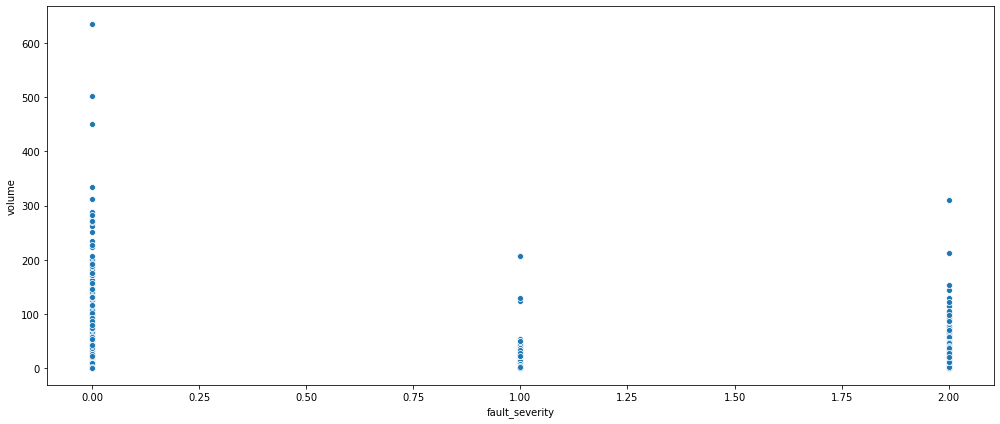

In [42]:
### Volume vs  fault severity ### 

plt.figure(figsize = (14, 6))
sns.scatterplot(x = train_4['fault_severity'], y = train_4['volume'])
plt.tight_layout()
plt.show()

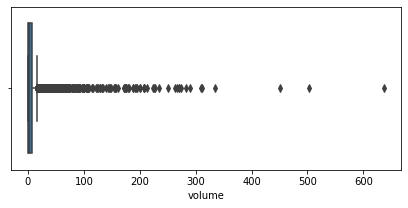

In [43]:
### Volume Dist ### 

plt.figure(figsize = (7, 3))
sns.boxplot(x = train_4['volume'])
plt.show()

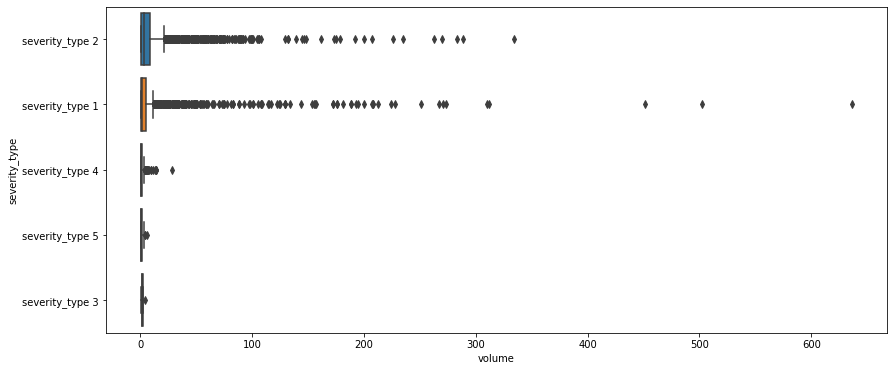

In [45]:
### Volume dist by severity type ###

plt.figure(figsize = (14, 6))
sns.boxplot(x = train_4['volume'], y = train_4['severity_type'])
plt.show()

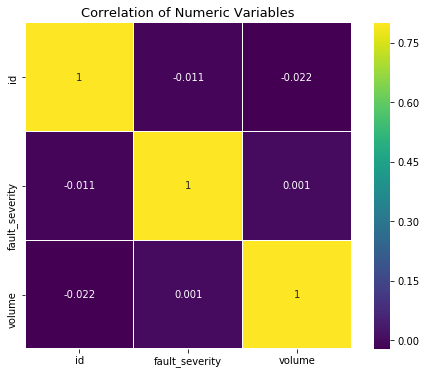

In [46]:
### Plot Correlation of numeric variables ### 

plt.figure(figsize = (8,6))
sns.heatmap(train_4.corr(), vmax = 0.8, linewidths = 0.01, square = True, 
           annot = True, cmap = 'viridis', linecolor = 'white')

plt.title('Correlation of Numeric Variables', fontsize = 13)
plt.show()